## **Convolutional Neural Network on MNIST**

In [15]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

## **Data Preparation**

### **Step 1. General Parameters**

1.   **num_classes** represents the number of output classes in the classification problem. For MNIST, there are 10 classes (digits 0 through 9).
2.   **input_shape** defines the shape of the input data, which is a 28x28 grayscale image (1 channel).



In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

### **Step 2. Train-Test Split**
Then we load the data and split it between **train and test sets**:

1.   **x_train** and **x_test** contain the input images
2.   **y_train** and **y_test** contain the corresponding labels.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### **Step 3. Scale images to the [0, 1] range**
The pixel values of the images are typically in the range [0, 255].
Scaling step scales these values to be in the range [0, 1], making it easier
for the neural network to learn.

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

###  **Step 4. Expanding dimensions**
ConvNets generally expect input images to have a channel dimension, even if it's just one channel. This step adds an extra dimension to the images to make them compatible with the specified input shape (Step 1).

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

### **Step 5. One-hot Encoding**
The labels in **y_train** and **y_test** are converted to binary class matrices using one-hot encoding. This is a common representation for categorical data in neural network training. Each label becomes a binary vector with a 1 in the corresponding class position and 0s elsewhere.

In [11]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## **Building the Model**

Here we use a Sequential Model. It is defined as a sequential stack of layers, which means the output of each layer is the input for the next.
**Layers:**
1.   **Input Layer** defines the input shape for the model, which is set to input_shape (28, 28, 1) based on the MNIST dataset (Step 1).
2.   **The first convolutional layer** has 32 filters with a kernel size of (3, 3) and uses the ReLU activation function.
3. **The first max pooling layer** reduces the spatial dimensions by taking the maximum value in each 2x2 region.
4. **The second convolutional layer** has 64 filters with a kernel size of (3, 3) and also uses the ReLU activation function.
5. **The second max pooling layer** further reduces the spatial dimensions.
6. **Flatten Layer** is used to flatten the output from the previous layer into a one-dimensional vector. It prepares the data for the fully connected layers.
7. **Dropout** is a regularization technique that randomly sets a fraction of input units to 0 at each update during training. In this case, 50% of the units are dropped out to prevent overfitting.
8. **Dense Layer** is a densely connected layer with num_classes neurons (10 for MNIST) and uses the softmax activation function. This layer produces the final output probabilities for each class.

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## **Training the Model**

1. **batch_size**: It is the number of training samples utilized in one iteration. The model weights are updated after each batch. In this case, 128 samples are used in each iteration.
2. **epochs**: It is the number of times the entire training dataset is passed forward and backward through the neural network. In this case, the model will be trained for 15 epochs.

Then the categorical crossentropy loss function is used, which is suitable for multi-class classification problems. The Adam optimizer is chosen for optimization, and accuracy is specified as the metric to be monitored during training.

validation_split=0.1 specifies that 10% of the training data will be used as validation data. This portion is not used for training but is used to evaluate the model's performance on unseen data during each epoch.

In [16]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 42s 98ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0279 - val_accuracy: 0.9928
Epoch 2/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0298 - val_accuracy: 0.9927
Epoch 3/15
422/422 [==============================] - 41s 96ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0264 - val_accuracy: 0.9925
Epoch 4/15
422/422 [==============================] - 40s 94ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0290 - val_accuracy: 0.9918
Epoch 5/15
422/422 [==============================] - 39s 91ms/step - loss: 0.0248 - accuracy: 0.9918 - val_loss: 0.0280 - val_accuracy: 0.9927
Epoch 6/15
422/422 [==============================] - 40s 94ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0284 - val_accuracy: 0.9935
Epoch 7/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0292 - val_accuracy:

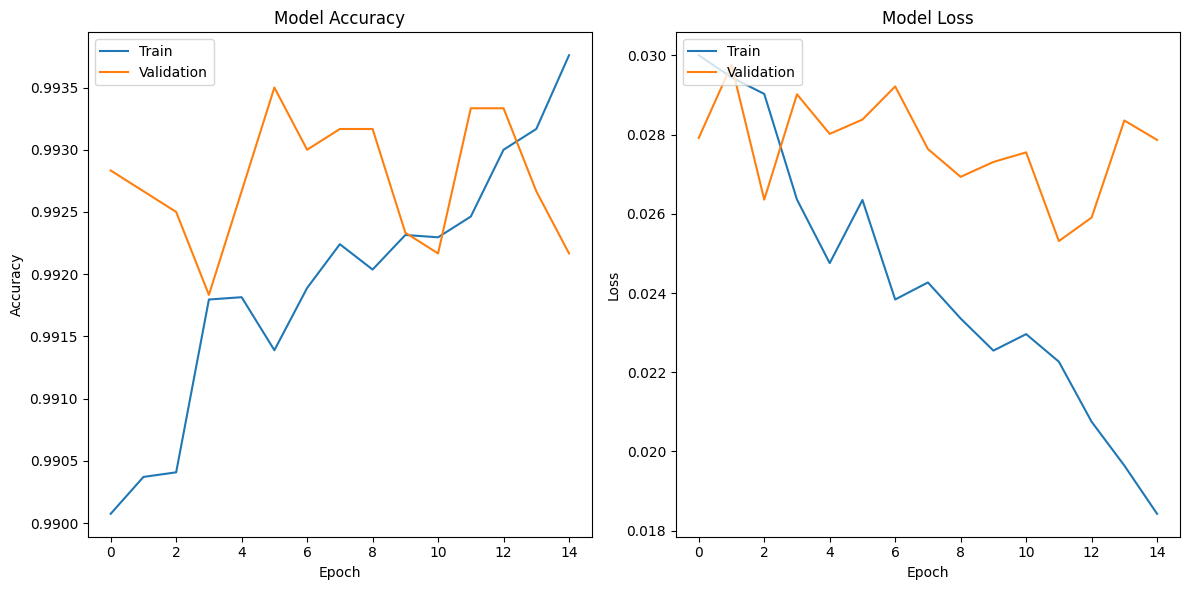

In [17]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Evaluating the Model**

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023984204977750778
Test accuracy: 0.9922000169754028
